# Credit risk modelling


The main purpose of this project is to analyse the behavior of German borrowers. To analyse what is the main purpose of loan , Anlayse the credit amount with duration , and also anlyse the varoius pattern which determine the loan is good or bad risk.
Many more question will be answered through in depth analysis of German borrowers.

In [99]:
#Importing all library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Reading and preprocessing the data

In [100]:
#Reading the data
df=pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [101]:
#Shape of the data
df.shape

(1000, 11)

In [102]:
#Types of the data
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [103]:
#Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [104]:
#Checking for null values
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [105]:
#Checking for Nan value
np.isnan(df.all())

Unnamed: 0          False
Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

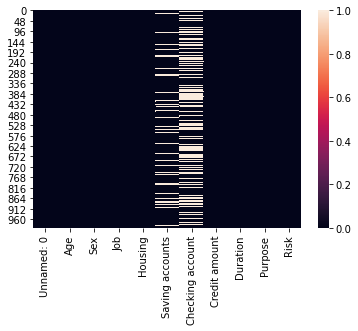

In [106]:
#Visualizing the null values
sns.heatmap(df.isnull())

In [107]:
# Stastical infromation of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


In [108]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

The average age of the people is 35 and the average credit amount is 3271. 
There are some missing values in saving account and checking account.

# Handlleing missing values

In [109]:
#There is missing value in two columns Saving account and Checing account
#As the missing values are in the categorical columns we need to convert into numerical values than fill the missing value.

df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [110]:

#Droping Unmamed column
df=df.drop(['Unnamed: 0'], axis=1)

In [111]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [112]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

# Exploratory data analysis

# Univaraite analysis

In [113]:
#Converting the Risk column into numerical from
df['Risk']= pd.Categorical(df['Risk'],['good','bad'])
df['Risk']=df['Risk'].cat.codes

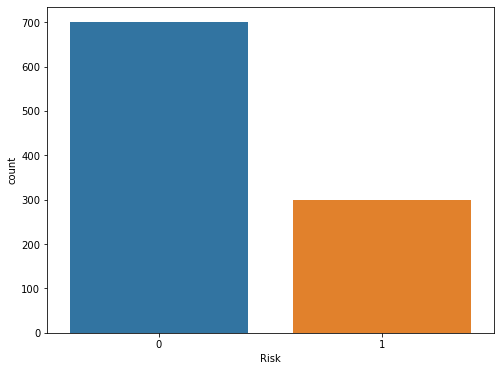

In [114]:
#Risk
plt.figure(figsize=(8,6))
sns.countplot(df.Risk, data=df)

In [115]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


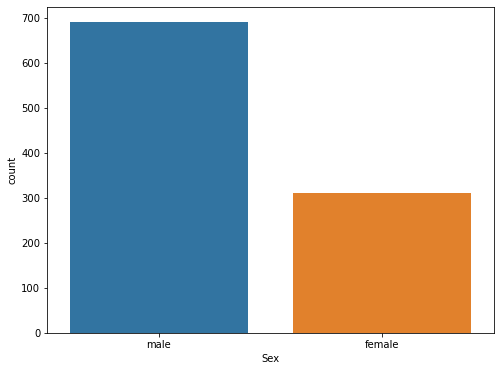

In [116]:
#Age 
plt.figure(figsize=(8,6))
sns.countplot(df.Sex)

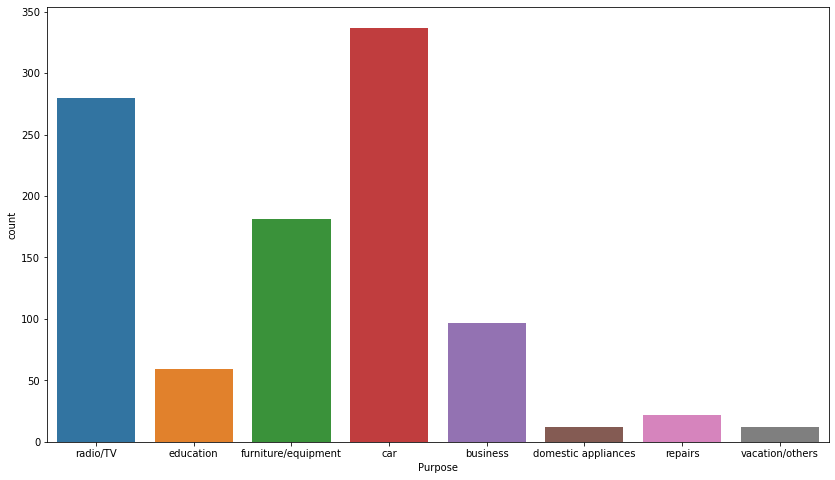

In [117]:
#Purpose of the credit
plt.figure(figsize=(14,8))
sns.countplot(df.Purpose)

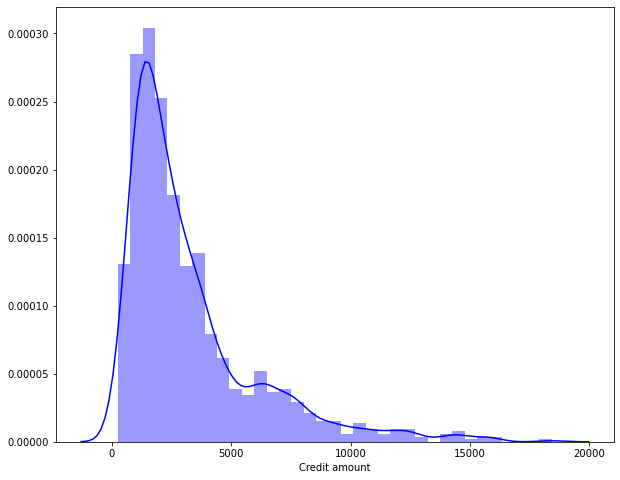

In [118]:
# Credit amount
plt.figure(figsize=(10,8))
sns.distplot(df['Credit amount'], color='blue')

In [119]:
# Converting Age into categorical variable
category= pd.cut(df.Age,bins=[19,30,60,80], labels=['young', 'Elder','old'])
df.insert(4,'Age Group', category)


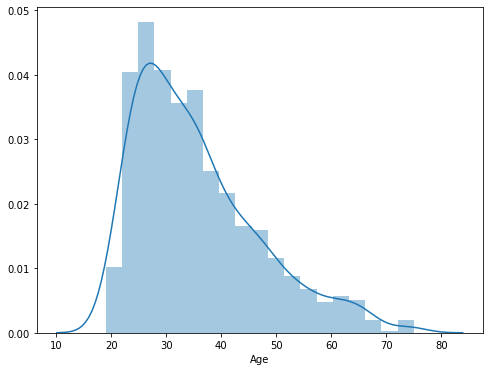

In [120]:
#Age distributio
plt.figure(figsize=(8,6))
sns.distplot(df.Age)

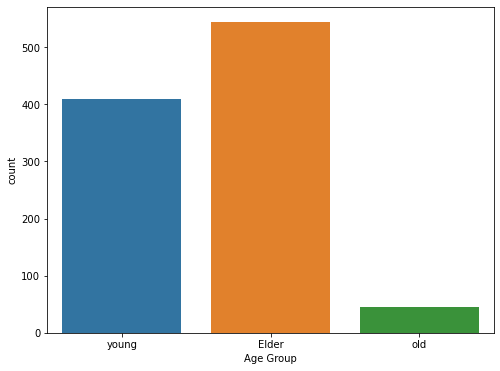

In [121]:
# Age
plt.figure(figsize=(8,6))
sns.countplot(df['Age Group'])

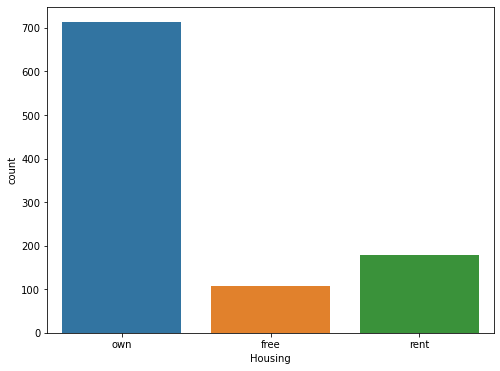

In [122]:
#Housing
plt.figure(figsize=(8,6))
sns.countplot(df.Housing)

In [123]:
df.head(2)

,Age,Sex,Job,Housing,Age Group,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,old,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,young,little,moderate,5951,48,radio/TV,1


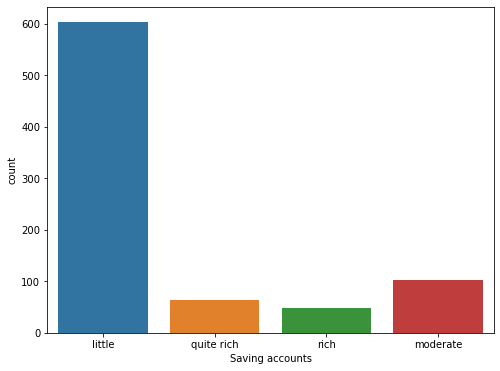

In [124]:
#Saving account
plt.figure(figsize=(8,6))
sns.countplot(df['Saving accounts'])

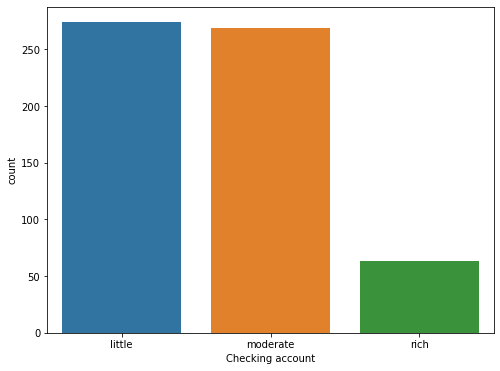

In [125]:
#Checking account
plt.figure(figsize=(8,6))
sns.countplot(df['Checking account'])

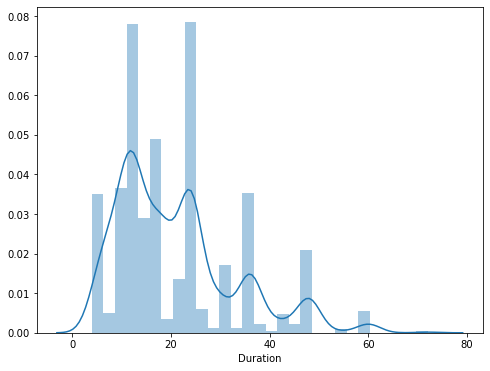

In [126]:
#Duration 
plt.figure(figsize=(8,6))
sns.distplot(df.Duration)

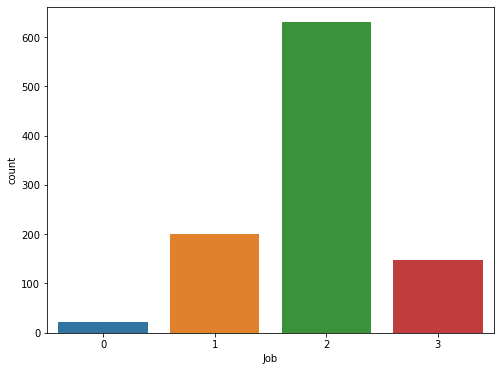

In [127]:
#job
plt.figure(figsize=(8,6))
sns.countplot(df.Job)

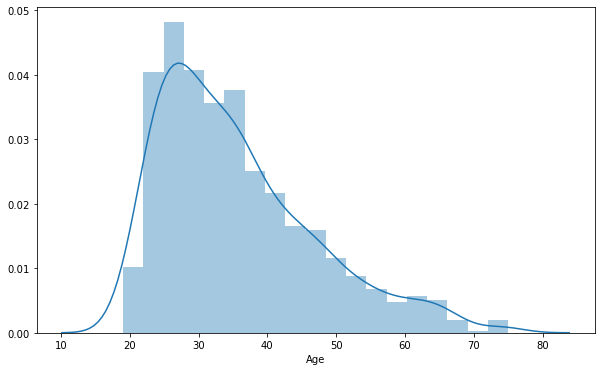

In [128]:
#Age distribution
plt.figure(figsize=(10,6))
sns.distplot(df['Age'])

# Summary



Most people take loan for purcahisng car and T.V .
More younger people take loan as compare to the older people.
The maxiumu number of peiple who took the loan comes under Elder age group.

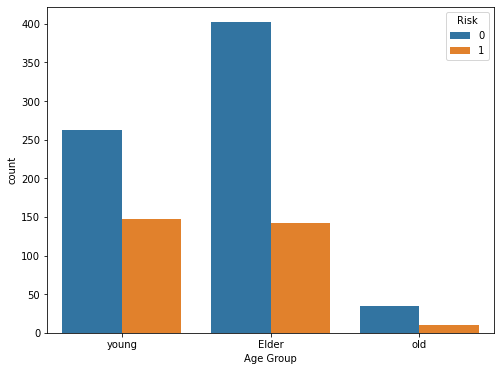

In [129]:
#Risk with age
plt.figure(figsize=(8,6))
sns.countplot(df['Age Group'], data=df, hue='Risk')

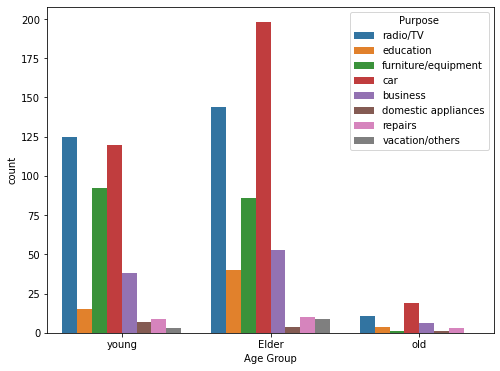

In [130]:
#Age_Group with purpose of credit 
 
plt.figure(figsize=(8,6))
sns.countplot(df['Age Group'], hue='Purpose', data=df)

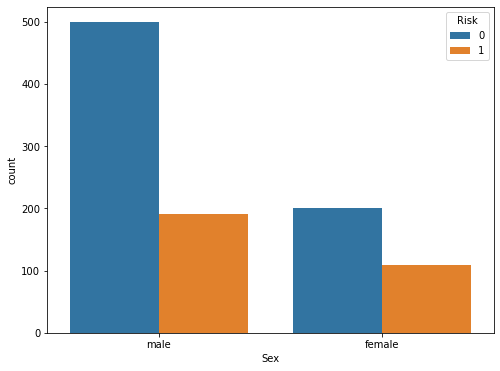

In [131]:
#Gender wise risk in credit
plt.figure(figsize=(8,6))
sns.countplot(df.Sex, hue='Risk',data=df)

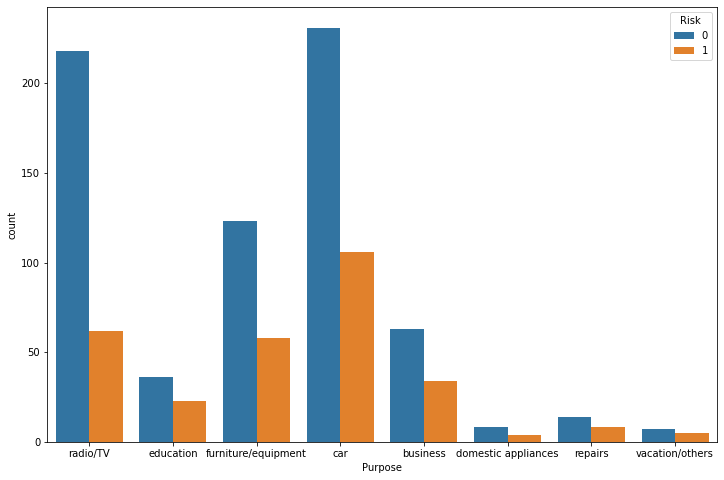

In [132]:
#Purpose and Risk
plt.figure(figsize=(12,8))
sns.countplot(df.Purpose, hue='Risk',data=df)

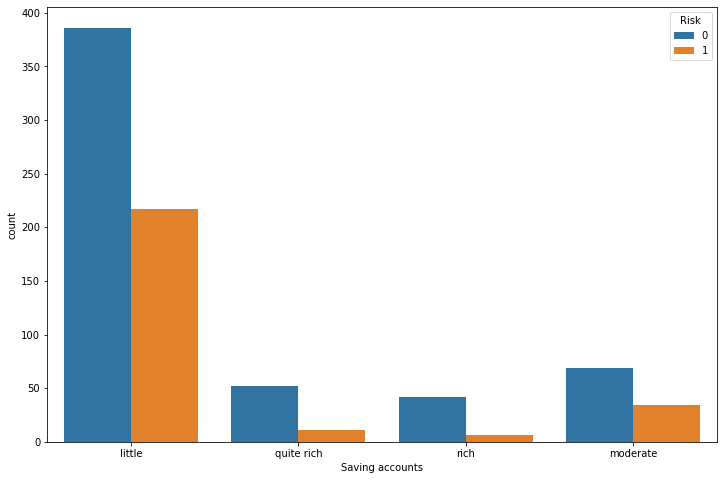

In [133]:
#Risk with saving account
plt.figure(figsize=(12,8))
sns.countplot(df['Saving accounts'],data=df, hue='Risk')


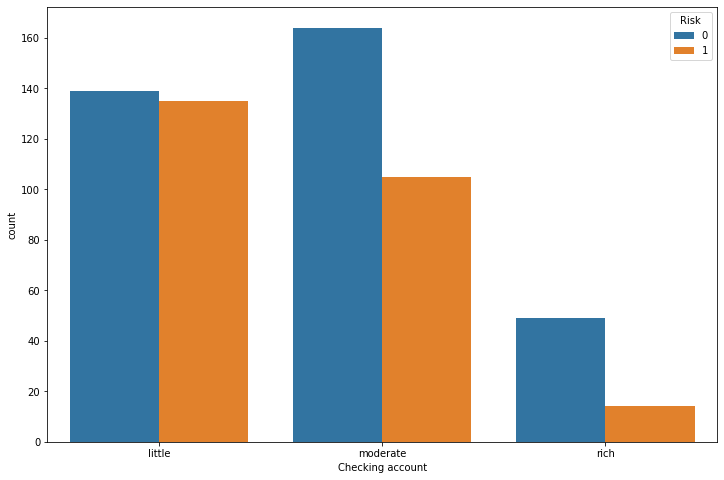

In [134]:
#Saving account with Risk
plt.figure(figsize=(12,8))
sns.countplot(df['Checking account'],data=df, hue='Risk')


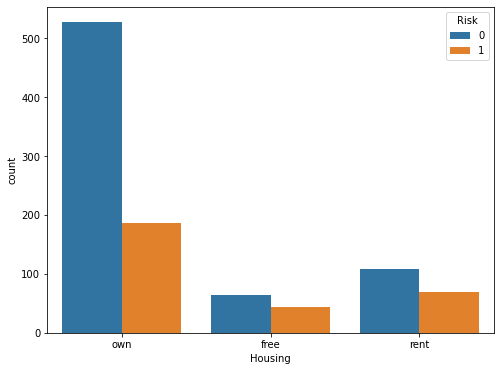

In [135]:
#Housing and Risk
plt.figure(figsize=(8,6))
sns.countplot(df.Housing, data=df,hue='Risk')

# Summary

The younger age group people mostly took loan for purchaisng TV/Radio and the Elder and the older age group people took loan for Car. The bad risk was higher in the younger age group.
The people with free house is higher chances of bad risk.


# Bivariate analysis

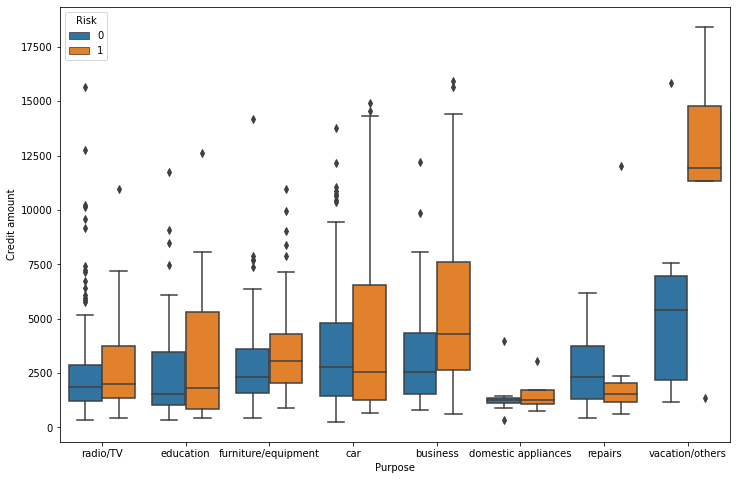

In [136]:
#Purpose with risk
plt.figure(figsize=(12,8))
sns.boxplot(x='Purpose' ,y='Credit amount',data=df,hue='Risk')

In [137]:
df.head(2)

,Age,Sex,Job,Housing,Age Group,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,old,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,young,little,moderate,5951,48,radio/TV,1


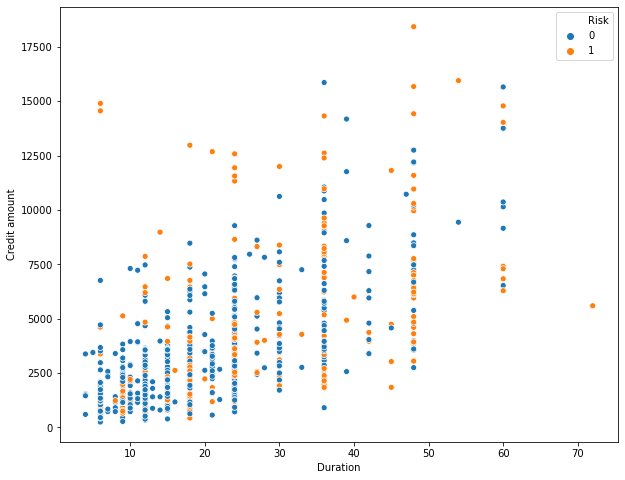

In [138]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Duration', y='Credit amount', hue='Risk', data =df)

In [139]:
df.head(2)

,Age,Sex,Job,Housing,Age Group,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,old,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,young,little,moderate,5951,48,radio/TV,1


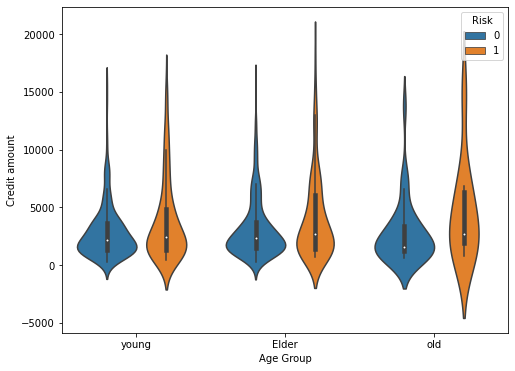

In [140]:
#To visulizing the risk associted with credit amount and age group
plt.figure(figsize=(8,6))
sns.violinplot(x='Age Group', y='Credit amount', hue='Risk', data=df)


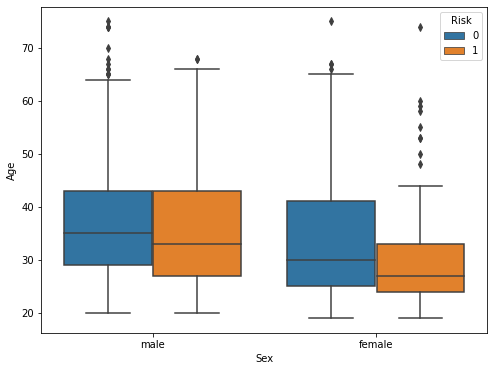

In [141]:
#Risk associated with gender and age 
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex', y='Age', hue='Risk', data=df)


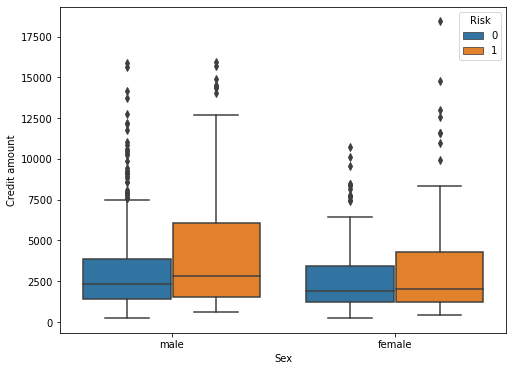

In [142]:
#Risk associated with gender and creditamout 
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex', y='Credit amount', hue='Risk', data=df)


# Multivariate analysis

C:\Users\47 NO SAHARPUR LPS\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


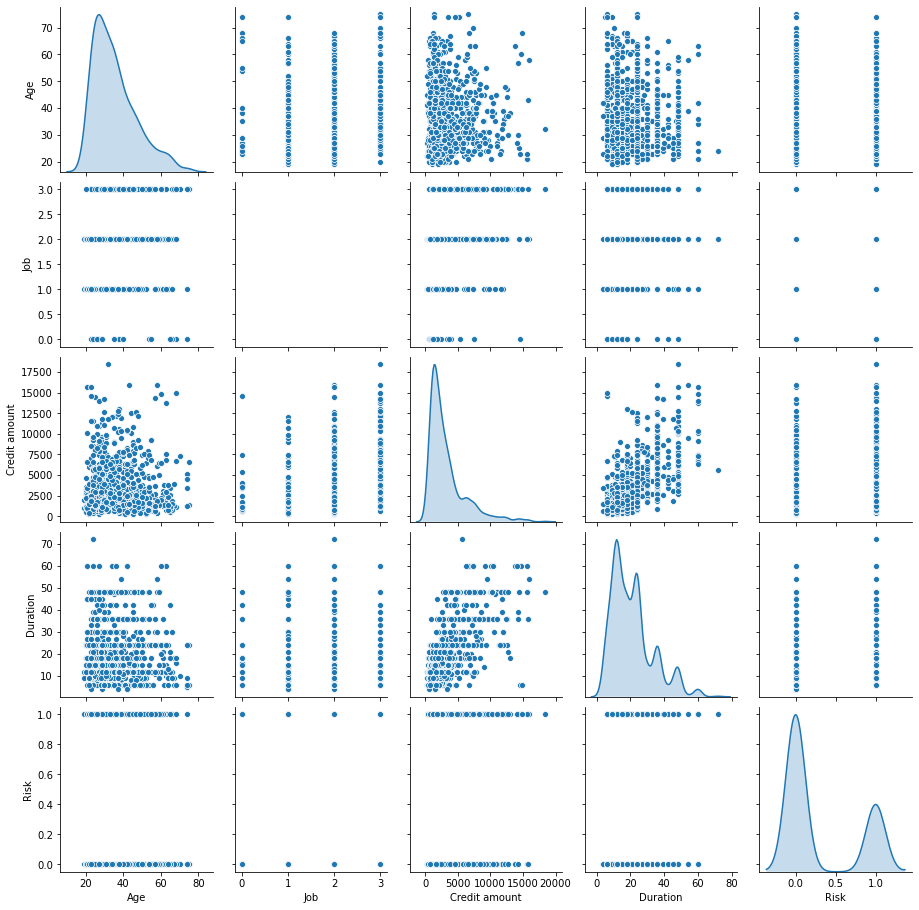

In [143]:
#Multivariate analysis of the variable
#Pairplot
sns.pairplot(df, diag_kind='kde')

# Corelation 

In [144]:
#Corelation of the variables
df.corr()

,Age,Job,Credit amount,Duration,Risk
Age,1.000000,0.015673,0.032716,-0.036136,-0.091127
Job,0.015673,1.000000,0.285385,0.210910,0.032735
Credit amount,0.032716,0.285385,1.000000,0.624984,0.154739
Duration,-0.036136,0.210910,0.624984,1.000000,0.214927
Risk,-0.091127,0.032735,0.154739,0.214927,1.000000


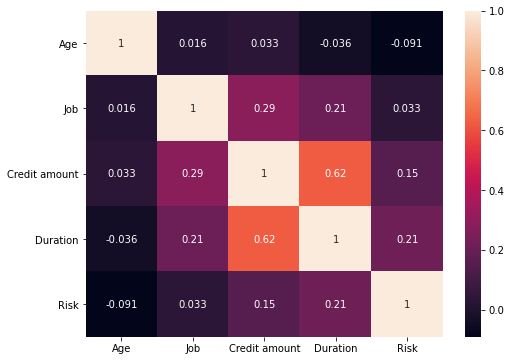

In [145]:
# Visulizing the corelation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

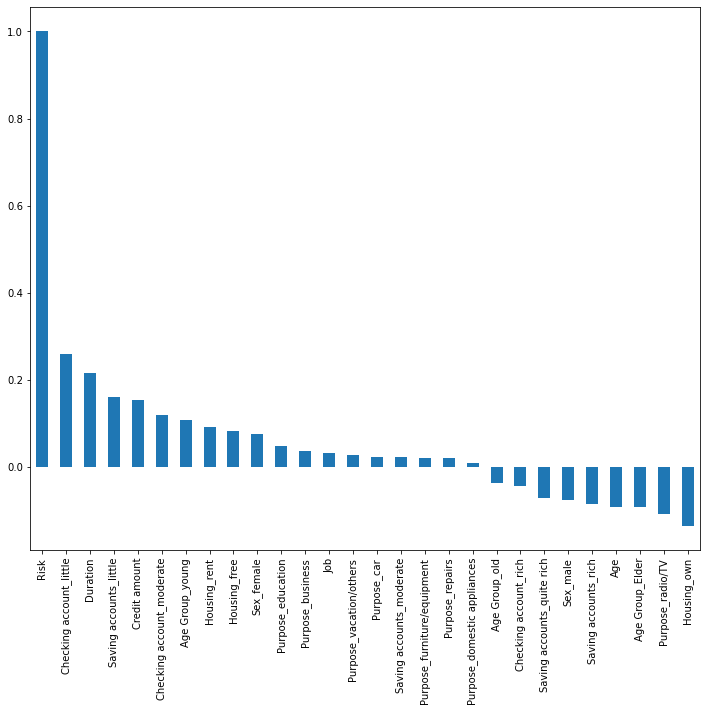

In [158]:
#corelation with Risk
plt.figure(figsize=(12,10))
df.corr()['Risk'].sort_values(ascending=False) .plot (kind='bar')

# Summary

 As we can see from the corelation matrix there is a significant negative relationship between Age and Risk . With increasing age the Risk is less. The credit amount is incresed in higher duartion of credit period.


# One Hot Encoding

In [147]:
#Dummy variables
df=pd.get_dummies(df)
df.head()

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Training the model



In [148]:
#Input split
x= df.drop('Risk', axis=1)

In [149]:
y= df['Risk']

In [150]:
#Spliting the data inti training and Test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2 , random_state=0)
from sklearn.metrics import confusion_matrix ,accuracy_score, classification_report

In [151]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\47 NO SAHARPUR LPS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [152]:
pred=log_reg.predict(x_test)

In [153]:
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int8)

In [154]:
dt  = round(accuracy_score(y_test, pred)*100, 2)
print(dt) 

73.0


In [155]:
#Displyaing the confusion matrix to see how the model performed

from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,pred)

In [156]:
#Confuison matrix
conf

array([[126,  16],
       [ 38,  20]], dtype=int64)

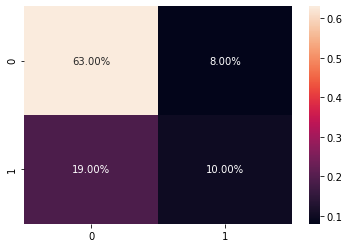

In [157]:
#Confusin matrix
sns.heatmap(conf/np.sum(conf), annot=True, fmt="0.2%")